In [1]:
import config
import os, numpy as np, pandas, sklearn
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
n = 100
multiTrack = False
context, x_test, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Hat.mid
 [INFO] : 
 |  reading file: ../datasets/examples/02 8th Cym.mid
 [INFO] : 
 |  reading file: ../datasets/examples/114_LetsDance_DavidBowie1.mid
 [INFO] : 
 |  reading file: ../datasets/examples/127_SweetChildOMine_GunsAndRoses1.mid
 [INFO] : 
 |  reading file: ../datasets/examples/92_GiveItAway_TheRedHotChiliPeppers.mid
 [INFO] : 
 |  reading file: ../datasets/examples/94_Creep_Radiohead2.mid
 [INFO] : 
 |  reading file: ../datasets/examples/bossa 1.mid
 [INFO] : 
 |  reading file: ../datasets/examples/bossa 2.mid
 [INFO] : 
 |  reading file: ../datasets/examples/bossa 3.mid
 [INFO] : 
 |  reading file: ../d

In [6]:
dn = config.export_dir
mid_new = midi.decode_track(context, x_test[-2])
io.export_midifile(mid_new, dn + 'encode_decoder2.mid')

 [DEBUG] > 
 |>  decode_track - input was not MultiTrack.
 |>  Assuming MultiTrack
 [INFO] : 
 |  len, max_t
 |  2.810416666666667
 |  3.0


In [7]:
min_f = 3
max_f = 20
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)

# x_train = np.zeros([10,100,127])
# y_train = x_train

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666683
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333333
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.991666666666669
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.996874999999999
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.991666666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.990625
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9916666666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9916666666666654
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000026
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9927083333333346
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.997916666666669
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666683
 |>  150
 [DEBUG] > 
 |>  to

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.995833333333333
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.997916666666665
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.01041666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0156249999999987
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.001041666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666727
 |>  150


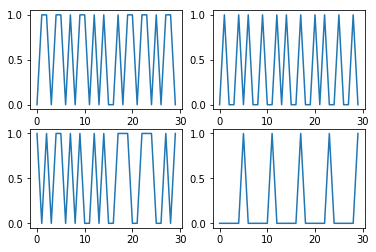

In [8]:
n6 = 30
plt.subplot(221)
plt.plot(x_train[0,:n6])
plt.subplot(222)
plt.plot(x_train[1,:n6])
plt.subplot(223)
plt.plot(x_train[2,:n6])
plt.subplot(224)
plt.plot(x_train[5,:n6])
# plt.plot(x_train[1,:n6,0:2])

In [9]:
# [sum(x) for x in x_train]
x_train.shape

(268, 150, 1)

In [33]:
y_train = x_train
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:]
# output_length = y_train.shape[1]
# output_length = (y_train[0]).shape[0] # = length of an individual label
hidden_layer_length = 100
x_train.shape

(268, 150, 1)

In [34]:
# functional syntax: lambda x: lambda y: z
k_reg = regularizers.l2(0.01)
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01)

def encoder(input_shape, output_length, dropout=0.10):
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Flatten()(x)
#     x = Dense(output_length * 2, activation='relu')(x)    
#     x = Dropout(dropout)(x)
    x = Dense(output_length, activation='relu')(x)
#     x = Dense(output_length, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(x)
#     x = Dropout(dropout)(x)
    x = Dense(output_length, activation='relu')(x)
#     x = Dense(output_length, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(x)
#     x = Dense(output_length, activation='sigmoid')(x)
#     x = Dropout(dropout)(x)
#     x = Dense(output_length, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
    #     model.add(Dropout(dropout))    
    model = Model(inputs=input_layer, outputs=x)
    return model


def decoder(input_length, output_shape, dropout=0.10):
    input_layer = Input(shape=(input_length,))
    x = input_layer
    shape = output_shape
    # shape = (10,100) # increase n dimensions
    
    x = Dense(np.prod(shape), activation='relu')(x)
#     x = Dense(np.prod(shape), activation='relu')(x)
#     x = Dropout(dropout)(x)
    x = Dropout(dropout)(x)
    x = Dense(np.prod(shape), activation='sigmoid')(x)
#     x = Dense(np.prod(shape), activation='sigmoid')(x) # 4*4*8 = 128
    x = Reshape(shape)(x)
#     x = UpSampling1D(10)(x)
    # make sure the conv layer increases the amount of dimensions
#     dims = keras.backend.int_shape(x)[1:]
#     n_steps = output_shape[0]
#     n_output_timesteps = output_shape[1]
#     filters = n_output_timesteps
#     conv_amt = 2
#     print('__+++==', n_output_timesteps)
#     x = Conv1D(filters, kernel_size=4, strides=2, activation='relu')(x) # 50,100

    dims = keras.backend.int_shape(x)[1:]
#     x = UpSampling1D(dims[0] * 2)(x)
#     x = Dense(output_shape[1], activation='relu')(x)
    #     x = LocallyConnected1D(output_shape[1], kernel_size=1, activation='relu')(x)
    # x = Dense(output_length, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=x)
    #     model.add(Dropout(dropout))
    return model


def autoencoder(input_shape, output_shape, hidden_layer_length=10, dropout=0.10, verbose=False):
    input_ = Input(shape=input_shape)
    encode = encoder(input_shape, hidden_layer_length, dropout)
    if verbose:
        encode.summary()
    decode = decoder(hidden_layer_length, output_shape, dropout)
    if verbose:
        decode.summary()
    model = Model(input_, decode(encode(input_)))
    return encode, decode, model

dropout = 0.1
encoder, decoder, auto = autoencoder(input_shape, output_shape, hidden_layer_length, dropout, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 150, 1)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
Total params: 25,200
Trainable params: 25,200
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_

In [35]:
metrics = ['accuracy','mse','mae']
loss = 'binary_crossentropy'# binary_crossentropy categorical_crossentropy
optimizer = 'adam' # adam adadelta rmsprop
auto.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [36]:
batch_size = 32
# n epochs = n iterations over all the training data
epochs = 90

In [37]:
m = 100
# xx = np.stack([x_train[0] for _ in range(m)])
# yy = xx
# history = auto.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = auto.fit(x_train[:m], y_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=1/6, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])

Train on 83 samples, validate on 17 samples
Epoch 1/90
83/83 [==============================] - 0s 2ms/step - loss: 0.6959 - acc: 0.5129 - mean_squared_error: 0.2514 - mean_absolute_error: 0.4994 - val_loss: 0.6860 - val_acc: 0.5757 - val_mean_squared_error: 0.2464 - val_mean_absolute_error: 0.4952
Epoch 2/90
83/83 [==============================] - 0s 215us/step - loss: 0.6847 - acc: 0.5733 - mean_squared_error: 0.2458 - mean_absolute_error: 0.4942 - val_loss: 0.6781 - val_acc: 0.6176 - val_mean_squared_error: 0.2425 - val_mean_absolute_error: 0.4910
Epoch 3/90
83/83 [==============================] - 0s 239us/step - loss: 0.6765 - acc: 0.6073 - mean_squared_error: 0.2417 - mean_absolute_error: 0.4895 - val_loss: 0.6696 - val_acc: 0.6529 - val_mean_squared_error: 0.2383 - val_mean_absolute_error: 0.4857
Epoch 4/90
83/83 [==============================] - 0s 179us/step - loss: 0.6669 - acc: 0.6372 - mean_squared_error: 0.2370 - mean_absolute_error: 0.4833 - val_loss: 0.6597 - val_acc: 

Epoch 64/90
83/83 [==============================] - 0s 272us/step - loss: 0.1739 - acc: 0.9364 - mean_squared_error: 0.0494 - mean_absolute_error: 0.1264 - val_loss: 0.5457 - val_acc: 0.7631 - val_mean_squared_error: 0.1707 - val_mean_absolute_error: 0.2999
Epoch 65/90
83/83 [==============================] - 0s 193us/step - loss: 0.1630 - acc: 0.9407 - mean_squared_error: 0.0464 - mean_absolute_error: 0.1186 - val_loss: 0.5442 - val_acc: 0.7643 - val_mean_squared_error: 0.1719 - val_mean_absolute_error: 0.3044
Epoch 66/90
83/83 [==============================] - 0s 194us/step - loss: 0.1610 - acc: 0.9422 - mean_squared_error: 0.0453 - mean_absolute_error: 0.1188 - val_loss: 0.5497 - val_acc: 0.7651 - val_mean_squared_error: 0.1712 - val_mean_absolute_error: 0.2975
Epoch 67/90
83/83 [==============================] - 0s 183us/step - loss: 0.1551 - acc: 0.9463 - mean_squared_error: 0.0435 - mean_absolute_error: 0.1138 - val_loss: 0.5502 - val_acc: 0.7635 - val_mean_squared_error: 0.171

(0, 0.7261932081486806)

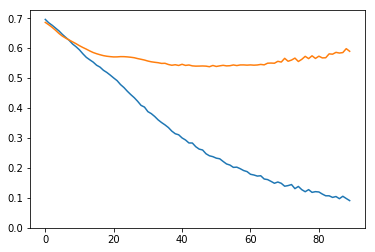

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(ymin=0)

(0, 1)

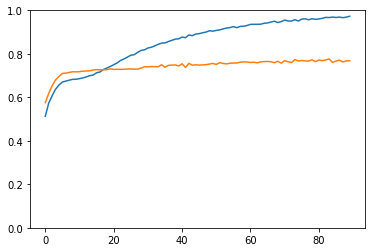

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylim(ymin=0, ymax=1)

In [40]:
results = auto.predict(x_train[:10])
results.shape

(10, 150, 1)

(0, 1)

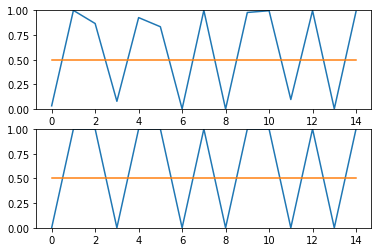

In [41]:
n1 = 15
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

plt.subplot(212)
plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

(0, 1)

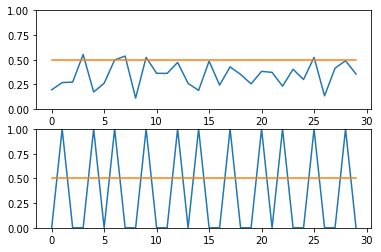

In [32]:
n1 = 30
i = 1
plt.subplot(211)
plt.plot(np.arange(n1), results[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [20]:
mid_true = midi.decode_track(context, x_train[0])
mid_pred = midi.decode_track(context, results[0])
dn = config.export_dir
io.export_midifile(mid_true, dn + 'real_mid_true.mid')
io.export_midifile(mid_pred, dn + 'real_mid_pred.mid')

 [DEBUG] > 
 |>  decode_track - input was not MultiTrack.
 |>  Assuming MultiTrack
 [INFO] : 
 |  len, max_t
 |  3.003125
 |  3.0
 [DEBUG] > 
 |>  decode_track - input was not MultiTrack.
 |>  Assuming MultiTrack
 [INFO] : 
 |  len, max_t
 |  3.003125
 |  3.0


In [21]:
mid_pred

<midi file None type 1, 1 tracks, 176 messages>

In [22]:
mid_true

<midi file None type 1, 1 tracks, 176 messages>

In [ ]:
labels[-2:]

In [ ]:
encoded = encoder.predict(x_test[-2:])
encoded.shape

In [ ]:
plt.plot(encoded[0,:10])
plt.plot(encoded[1,:10])

In [ ]:
new = encoded[:2].transpose().mean(axis=1).transpose()
# encoded[:2].mean(axis=0)
plt.plot(new[:10])

In [ ]:
y_test = decoder.predict(encoded)
y_test.shape

In [ ]:
n1 = 30
i = 1
plt.subplot(211)
plt.plot(np.arange(n1), y_test[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), y_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [ ]:
new_ = decoder.predict(np.stack([new]))

In [ ]:
mid_new = midi.decode_track(context, new_[0])
io.export_midifile(mid_new, dn + 'real_mid_new.mid')